In [3]:
import cv2
# conda install opencv
# pip install opencv-python
import numpy as np
from PIL import Image
import os
import csv
import tensorflow as tf

In [2]:
def get_path_caption():
    img_paths = []
    captions = []

    with open('..\\..\\datasets\\captions.csv') as csvfile:
        csvreader = csv.reader(csvfile, delimiter='|')
        next(csvreader)
        for row in csvreader:
            img_paths.append(row[0])
            captions.append(row[2].lstrip())

    return img_paths, captions

In [4]:
img_paths, captions = get_path_caption()

In [96]:
img_name = img_paths[0]
print(img_name)
img = Image.open('..\\..\\datasets\\images\\' + img_name)

pix = np.array(img)
print(pix)

1000092795.jpg
[[[  0   6   4]
  [  2   6   5]
  [  3   5   4]
  ...
  [219 244 249]
  [222 253 255]
  [221 249 250]]

 [[  4   8   7]
  [  3   5   4]
  [  5   7   6]
  ...
  [228 253 250]
  [212 245 254]
  [218 253 255]]

 [[  3   3   3]
  [  4   4   4]
  [  5   5   5]
  ...
  [242 255 255]
  [232 255 251]
  [214 245 250]]

 ...

 [[166 177 147]
  [180 188 131]
  [130 155 100]
  ...
  [106 158  86]
  [134 172 113]
  [107 163  72]]

 [[202 219 151]
  [144 175 115]
  [133 160 117]
  ...
  [157 188 129]
  [156 186 124]
  [157 196 117]]

 [[144 157  87]
  [185 211 172]
  [184 214 152]
  ...
  [156 186 122]
  [191 200 153]
  [106 126  65]]]


In [103]:
print(img.size)
print(pix[200][200])
print(img.mode)
print(img.format)
data = np.asarray(img)
print(type(data))
print(data.shape)
# print(data)
data2 = data.copy()
data2.resize(255, 255, 3)
# data.resize(255, 255)
print(data2)
print(data2.shape)

(333, 500)
[103  70  25]
RGB
JPEG
<class 'numpy.ndarray'>
(500, 333, 3)
[[[  0   6   4]
  [  2   6   5]
  [  3   5   4]
  ...
  [219 250 255]
  [217 250 255]
  [216 249 254]]

 [[216 249 254]
  [215 250 254]
  [216 251 255]
  ...
  [166 201 143]
  [159 182 126]
  [159 193 109]]

 [[206 228 156]
  [165 193 145]
  [161 203 183]
  ...
  [ 51 108   0]
  [129 162  73]
  [211 214 185]]

 ...

 [[  4  22   0]
  [  9  31  10]
  [ 29  78  33]
  ...
  [ 41 163 168]
  [ 59 162 177]
  [ 51 167 166]]

 [[ 67 169 174]
  [ 75 166 184]
  [ 67 173 187]
  ...
  [213 216 199]
  [186 186 174]
  [115 113  98]]

 [[141 146 124]
  [143 136 120]
  [150 146 135]
  ...
  [  3   5   2]
  [ 32  26  26]
  [ 30  32  21]]]
(255, 255, 3)


In [94]:
from tensorflow.keras.layers import Input
input_shape = (255, 255, 3)
img_input = Input(shape=input_shape)
mean, var = tf.nn.moments(data, axes=[0,1])

TypeError: data type not understood

In [17]:
dataset = img_paths[:10]

def normalize(x, y):
    x = tf.image.per_image_standardization(x)
    return x, y

In [ ]:
from tensorflow.keras.layers import Input

input_shape = (255, 255, 3)
img_input = Input(shape=input_shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

90.62735735735735 5844.546793116541
90.62735735735735 5844.546793116541
90.62735735735735 5844.546793116541
90.62735735735735 5844.546793116541
90.62735735735735 5844.546793116541
151.38964349376113 5462.160049605524
151.38964349376113 5462.160049605524
151.38964349376113 5462.160049605524
151.38964349376113 5462.160049605524
151.38964349376113 5462.160049605524


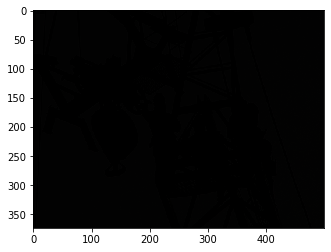

In [15]:
import matplotlib.pyplot as plt
path = '..\\..\\datasets\\images\\'
img_path = img_paths[:10]
images = []
for f in img_path:
    img = Image.open(path + f)
    # resize_img = img.resize((255, 255))
    # image = np.asarray(resize_img)
    mean = np.mean(img, axis=(0, 1, 2))
    var = np.var(img, axis=(0, 1, 2))
    print(mean, var)
    image2 = ((img - mean) / var)
    # print(image2)
    plt.imshow(image2)
    
# images = np.asarray(images)

In [9]:
arr = np.array(
    [
        [
            [1, 2, 3],
            [4, 5, 6]
        ],
        [
            [11, 12, 13],
            [14, 15, 16]
        ]
    ]
)

print(arr)
print(arr.shape)

[[[ 1  2  3]
  [ 4  5  6]]

 [[11 12 13]
  [14 15 16]]]
(2, 2, 3)


In [125]:
print('arr.sum(axis=1)')
print(arr.sum(axis=1))
print('arr.sum(axis=0)')
print(arr.sum(axis=0))
print('arr.sum(axis=2)')
print(arr.sum(axis=2))

arr.sum(axis=1)
[[ 5  7  9]
 [25 27 29]]
arr.sum(axis=0)
[[12 14 16]
 [18 20 22]]
arr.sum(axis=2)
[[ 6 15]
 [36 45]]


In [127]:
print('arr.sum(axis=(0, 1))')
print(arr.sum(axis=(0, 1)))
print('arr.mean(axis=(0, 1))')
print(arr.mean(axis=(0, 1)))

arr.sum(axis=(0, 0))
[30 34 38]
arr.mean(axis=(0, 1))
[7.5 8.5 9.5]


In [10]:
print('arr.sum(axis=(0, 1, 2))')
print(arr.sum(axis=(0, 1, 2)))

arr.sum(axis=(0, 1, 2))
102
